In [2]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

### Connecting with Twitter API

In [3]:
%run ./keys.ipynb
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Political Sentiment:
- Dataframes of tweets of each party. 
- Dataframes of mentions of users for each party. 

- Machine learning for evalutating the sentiment of tweets and mentions.

## 1. PARTIDO POPULAR

In [4]:
# last 100 tweets of PP
pp_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='populares',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(1000)]

In [5]:
pp_json_response = [tweet._json for tweet in pp_tweets]
df_pp_alltweets = pd.json_normalize(pp_json_response)

In [6]:
# numerical columns pp
df_pp_alltweets.describe()

,id,retweet_count,favorite_count,user.id,user.followers_count,user.friends_count,user.listed_count,user.favourites_count,user.statuses_count,retweeted_status.id,...,quoted_status.user.utc_offset,quoted_status.user.time_zone,quoted_status.user.statuses_count,quoted_status.user.lang,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.retweet_count,quoted_status.favorite_count
count,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.000000,3.890000e+02,...,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.0,6.000000,6.000000
mean,1.375413e+18,373.645000,228.25600,20509689.0,820359.160000,5295.0,4904.0,44481.0,102095.920000,1.375750e+18,...,NaN,NaN,169360.500000,NaN,NaN,NaN,NaN,NaN,1256.666667,2654.666667
std,3.963937e+15,1463.277856,552.85169,0.0,9.018633,0.0,0.0,0.0,0.392114,3.898851e+15,...,NaN,NaN,224280.623354,NaN,NaN,NaN,NaN,NaN,1294.120345,2450.876551
min,1.369244e+18,2.000000,0.00000,20509689.0,820315.000000,5295.0,4904.0,44481.0,102094.000000,1.369204e+18,...,NaN,NaN,12143.000000,NaN,NaN,NaN,NaN,NaN,7.000000,9.000000
25%,1.371553e+18,63.000000,0.00000,20509689.0,820361.000000,5295.0,4904.0,44481.0,102096.000000,1.371912e+18,...,NaN,NaN,52292.250000,NaN,NaN,NaN,NaN,NaN,309.750000,780.500000
50%,1.375135e+18,116.500000,93.00000,20509689.0,820361.000000,5295.0,4904.0,44481.0,102096.000000,1.375508e+18,...,NaN,NaN,118653.000000,NaN,NaN,NaN,NaN,NaN,880.500000,2427.000000
75%,1.379396e+18,260.250000,232.25000,20509689.0,820361.000000,5295.0,4904.0,44481.0,102096.000000,1.379479e+18,...,NaN,NaN,119763.000000,NaN,NaN,NaN,NaN,NaN,1958.250000,3863.500000
max,1.381668e+18,26315.000000,8599.00000,20509689.0,820361.000000,5295.0,4904.0,44481.0,102096.000000,1.381648e+18,...,NaN,NaN,616409.000000,NaN,NaN,NaN,NaN,NaN,3335.000000,6491.000000


In [7]:
df_pp_alltweets.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates
0,Mon Apr 12 18:00:11 +0000 2021,1381668484422246413,1381668484422246413,🧑🏽‍⚕️ Gracias a todos los profesionales de la ...,False,"[0, 283]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 12 16:41:54 +0000 2021,1381648785202352129,1381648785202352129,RT @pablocasado_: Échense la mano a la cartera...,False,"[0, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# now, we select just the columns that are important for our analysis:

columns_selected = ['user.name', 'created_at', 'id', 'full_text','retweeted_status.full_text', 'display_text_range', 
                    'source', 'retweet_count', 'favorite_count', 'user.followers_count', 
                    'user.friends_count', 'user.statuses_count', 'entities.hashtags', 'entities.urls']

In [9]:
df_pp = df_pp_alltweets[columns_selected]

In [13]:
df_pp.head(3)

,user.name,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Partido Popular,Mon Apr 12 18:00:11 +0000 2021,1381668484422246413,🧑🏽‍⚕️ Gracias a todos los profesionales de la ...,NaN,"[0, 283]","<a href=""https://mobile.twitter.com"" rel=""nofo...",44,69,820361,5295,102096,"[{'text': 'AtenciónPrimaria', 'indices': [46, ...",[]
1,Partido Popular,Mon Apr 12 16:41:54 +0000 2021,1381648785202352129,RT @pablocasado_: Échense la mano a la cartera...,Échense la mano a la cartera. Este es el infie...,"[0, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",263,0,820361,5295,102096,[],"[{'url': 'https://t.co/F7iFTz9Mkh', 'expanded_..."
2,Partido Popular,Mon Apr 12 15:51:34 +0000 2021,1381636116655308800,RT @pablocasado_: 2.500 jueces alertan a la UE...,"2.500 jueces alertan a la UE de la ""violación ...","[0, 140]","<a href=""https://about.twitter.com/products/tw...",293,0,820361,5295,102096,[],[]


In [14]:
# cleaning dates column

def transforming_format_dates(column):
    
    list_dates = list(column)
    
    new_format_dates = []

    for d in list_dates:
        old_format_date = datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y')
        new_format_date = datetime.strftime(old_format_date, '%d-%m-%Y')
        new_format_dates.append(new_format_date)
        
    return new_format_dates

In [15]:
df_pp['created_at'] = transforming_format_dates(df_pp['created_at'])

<ipython-input-15-796c04f5b5dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pp['created_at'] = transforming_format_dates(df_pp['created_at'])


In [21]:
# cleaning source column 

def cleaning_source(column):
    
    list_sources = list(column)
    
    sources_clean = [re.findall(r'\>(.*?)\<', s) for s in list_sources]
        
    return sources_clean

In [22]:
df_pp['source'] = cleaning_source(df_pp['source'])

<ipython-input-22-943fc571586d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pp['source'] = cleaning_source(df_pp['source'])


In [24]:
df_pp.head(3)

,user.name,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Partido Popular,12-04-2021,1381668484422246413,🧑🏽‍⚕️ Gracias a todos los profesionales de la ...,NaN,"[0, 283]",[Twitter Web App],44,69,820361,5295,102096,"[{'text': 'AtenciónPrimaria', 'indices': [46, ...",[]
1,Partido Popular,12-04-2021,1381648785202352129,RT @pablocasado_: Échense la mano a la cartera...,Échense la mano a la cartera. Este es el infie...,"[0, 140]",[Twitter Web App],263,0,820361,5295,102096,[],"[{'url': 'https://t.co/F7iFTz9Mkh', 'expanded_..."
2,Partido Popular,12-04-2021,1381636116655308800,RT @pablocasado_: 2.500 jueces alertan a la UE...,"2.500 jueces alertan a la UE de la ""violación ...","[0, 140]",[TweetDeck],293,0,820361,5295,102096,[],[]


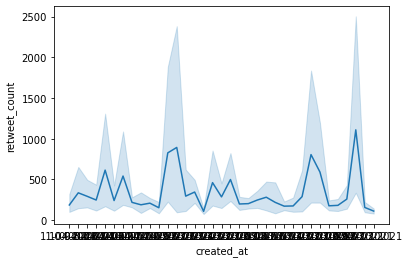

In [27]:
# visualization
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=df_pp, x='created_at', y='retweet_count')

In [28]:
# rts, favs por día.
daily_results_pp = df_pp.groupby('created_at').sum()
daily_results_pp

,id,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count
created_at,,,,,,
01-04-2021,2.204132e+19,2439.0,3836.0,13124586.0,84720.0,1632876.0
02-04-2021,1.791329e+19,2712.0,3971.0,10663809.0,68835.0,1326715.0
03-04-2021,9.648043e+18,1321.0,1465.0,5742051.0,37065.0,714385.0
04-04-2021,2.205912e+19,3494.0,4114.0,13124688.0,84720.0,1632880.0
05-04-2021,4.275041e+19,16798.0,6408.0,25429083.0,164145.0,3163705.0
06-04-2021,5.517689e+19,9627.0,5708.0,32811720.0,211800.0,4082200.0
07-04-2021,4.415305e+19,19670.0,5378.0,26249376.0,169440.0,3265760.0
08-03-2021,4.243756e+19,3453.0,3579.0,25429083.0,164145.0,3163705.0
08-04-2021,5.382534e+19,9641.0,8781.0,31991427.0,206505.0,3980145.0


In [ ]:
# que los gráficos con fecha comiencen por el final.

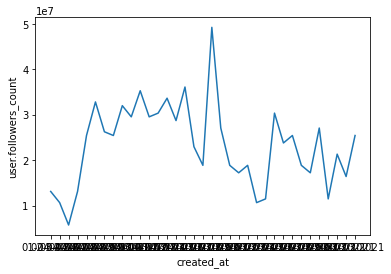

In [29]:
# gráficos: seguidores por día.
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=daily_results_pp, x='created_at', y='user.followers_count')

## 2. PSOE

In [67]:
# last 100 tweets of PSOE
psoe_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='psoe',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(1000)]

In [68]:
psoe_json_response = [tweet._json for tweet in psoe_tweets]
df_psoe_alltweets = pd.json_normalize(psoe_json_response)

In [72]:
df_psoe_alltweets.shape

(1000, 333)

In [73]:
df_psoe = df_psoe_alltweets[columns_selected]

In [74]:
df_psoe['created_at'] = transforming_format_dates(df_psoe['created_at'])

<ipython-input-74-b8d2c72a71d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psoe['created_at'] = transforming_format_dates(df_psoe['created_at'])


In [75]:
df_psoe.shape

(1000, 14)

In [76]:
df_total = df_pp.append(df_psoe)

In [77]:
df_total.to_csv('../../../Desktop/df_psoe_pp.csv')

In [78]:
df_total

,user.name,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Partido Popular,11-04-2021,1381315467369979906,"""El 4M va a haber un día menos para que Sánche...",NaN,"[0, 87]","<a href=""https://mobile.twitter.com"" rel=""nofo...",33,81,820293,5295,102055,[],[]
1,Partido Popular,11-04-2021,1381312987873603585,"“Creo en Isabel Díaz Ayuso y en su gestión, ap...",NaN,"[0, 147]","<a href=""https://studio.twitter.com"" rel=""nofo...",85,296,820293,5295,102055,[],[]
2,Partido Popular,11-04-2021,1381311206615572490,“Hay que centrarnos en lo que nos une. Toca su...,NaN,"[0, 204]","<a href=""https://studio.twitter.com"" rel=""nofo...",54,172,820293,5295,102055,[],[]
3,Partido Popular,11-04-2021,1381310372435652610,“Lo importante es que no prospere lo que el PS...,NaN,"[0, 189]","<a href=""https://studio.twitter.com"" rel=""nofo...",63,220,820293,5295,102055,[],[]
4,Partido Popular,11-04-2021,1381295133770022920,El efecto Teo. https://t.co/rRGDkP1cAN,NaN,"[0, 14]","<a href=""http://twitter.com/download/iphone"" r...",155,355,820293,5295,102055,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PSOE,16-03-2021,1371793275502346243,Impulsamos una iniciativa contra la censura pa...,NaN,"[0, 280]","<a href=""https://www.twitter.com/"" rel=""nofoll...",97,158,821974,13448,120090,"[{'text': 'LaEspanaQueHacemos_', 'indices': [2...",[]
996,PSOE,16-03-2021,1371792868147335173,"Este jueves, el @Congreso_Es vota definitivame...",NaN,"[0, 263]","<a href=""https://www.twitter.com/"" rel=""nofoll...",74,124,821974,13448,120090,"[{'text': 'LaEspanaQueHacemos_', 'indices': [2...",[]
997,PSOE,16-03-2021,1371790167502172160,📡 En Directo. Rueda de prensa de la vicesecret...,NaN,"[0, 202]","<a href=""https://studio.twitter.com"" rel=""nofo...",65,84,821974,13448,120090,"[{'text': 'PSOE', 'indices': [63, 68]}, {'text...","[{'url': 'https://t.co/h7Zd0rqD8S', 'expanded_..."
998,PSOE,16-03-2021,1371788334314483715,RT @IratxeGarper: @lugaricano Dile que escuche...,@lugaricano Dile que escuche a Gabilondo https...,"[0, 82]","<a href=""https://mobile.twitter.com"" rel=""nofo...",139,0,821974,13448,120090,[],[]


## 3. PODEMOS

In [35]:
# last 100 tweets of PODEMOS
podemos_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='podemos',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

podemos_json_response = [tweet._json for tweet in podemos_tweets]
df_podemos_alltweets = pd.json_normalize(podemos_json_response)

In [37]:
df_podemos_alltweets[columns_selected].head()

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 09:00:00 +0000 2021,1380807766760062979,"Frente a su violencia, su odio y sus mentiras,...",NaN,"[0, 71]","<a href=""https://studio.twitter.com"" rel=""nofo...",45,95,1525117,19967,118542,"[{'text': 'QueHableLaMayoría', 'indices': [47,...",[]
1,Sat Apr 10 08:58:25 +0000 2021,1380807368032849924,RT @PodemosGetafe: Basta ya del abandono de nu...,Basta ya del abandono de nuestros colegios y h...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",41,0,1525117,19967,118542,[],[]
2,Sat Apr 10 08:58:16 +0000 2021,1380807332683190272,RT @PodemosMostoles: Porque defender los #Serv...,Porque defender los #ServiciosPublicos es la b...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",28,0,1525117,19967,118542,"[{'text': 'ServiciosPublicos', 'indices': [41,...",[]
3,Sat Apr 10 08:55:24 +0000 2021,1380806611392991235,"RT @IdoiaVR: Porque somos muchos y muchas más,...","Porque somos muchos y muchas más, el #4M parti...","[0, 140]","<a href=""https://about.twitter.com/products/tw...",34,0,1525117,19967,118542,"[{'text': '4M', 'indices': [50, 53]}, {'text':...",[]
4,Sat Apr 10 08:50:00 +0000 2021,1380805249443581953,El 4 de mayo será tu voz la que se escuche. \n...,NaN,"[0, 64]","<a href=""https://about.twitter.com/products/tw...",54,91,1525117,19967,118542,"[{'text': 'QueHableLaMayoría', 'indices': [46,...",[]


## 4. CUIDADANOS

In [39]:
# last 100 tweets of Ciudadanos
ciudadanos_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='ciudadanoscs',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

ciudadanos_json_response = [tweet._json for tweet in ciudadanos_tweets]
df_ciudadanos_alltweets = pd.json_normalize(ciudadanos_json_response)

In [40]:
df_ciudadanos_alltweets[columns_selected].head(3)

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 09:13:16 +0000 2021,1380811106793496577,Cuando Cs habla de sensatez y diálogo nos cree...,NaN,"[0, 253]","<a href=""https://studio.twitter.com"" rel=""nofo...",0,0,521536,89295,174910,"[{'text': 'MadrileñosPorEdmundoBal', 'indices'...",[]
1,Sat Apr 10 09:10:41 +0000 2021,1380810457070592008,💪🍊 Para el #4M necesitamos mucha ilusión y esf...,NaN,"[0, 219]","<a href=""https://studio.twitter.com"" rel=""nofo...",3,1,521536,89295,174910,"[{'text': '4M', 'indices': [11, 14]}, {'text':...",[]
2,Sat Apr 10 09:06:39 +0000 2021,1380809442397200386,Madrid\n\n🏍 Es dinámica y moderna.\n🏃‍♂️ Es es...,NaN,"[0, 273]","<a href=""https://studio.twitter.com"" rel=""nofo...",32,35,521536,89295,174910,"[{'text': 'MadrileñosPorEdmundoBal', 'indices'...",[]


## 5. VOX

In [41]:
# last 100 tweets of VOX
vox_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='vox_es',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

vox_json_response = [tweet._json for tweet in vox_tweets]
df_vox_alltweets = pd.json_normalize(vox_json_response)

In [42]:
df_vox_alltweets[columns_selected].head(3)

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 08:31:41 +0000 2021,1380800638989316097,RT @eldisidenteOK: El testimonio de un obrero ...,El testimonio de un obrero emocionado que vivi...,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",603,0,438096,1255,55231,[],[]
1,Sat Apr 10 08:25:59 +0000 2021,1380799204780601344,RT @Santi_ABASCAL: #SanFernandoDeHenaresEnPie\...,#SanFernandoDeHenaresEnPie\nSan Fernando de He...,"[0, 129]","<a href=""http://twitter.com/download/iphone"" r...",264,0,438096,1255,55231,"[{'text': 'SanFernandoDeHenaresEnPie', 'indice...",[]
2,Sat Apr 10 08:18:39 +0000 2021,1380797362860343297,RT @Igarrigavaz: VOX comienza su ofensiva para...,VOX comienza su ofensiva para fiscalizar TV3 y...,"[0, 113]","<a href=""http://twitter.com/download/iphone"" r...",1346,0,438096,1255,55231,[],"[{'url': 'https://t.co/70et558epG', 'expanded_..."
